In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import io
from PIL import Image

In [5]:
# Load dataset
df = pd.read_csv("../stock_data_csv/AHPC.csv")
df["published_date"] = pd.to_datetime(df["published_date"])
df.sort_values("published_date", inplace=True)

df

,published_date,open,high,low,close,per_change,traded_quantity,traded_amount,status,Category
0,2009-11-25,408.0,790.0,790.0,790.0,NaN,10.0,0.0,0,Hydropower
1,2009-12-03,790.0,770.0,740.0,740.0,-6.33,50.0,0.0,0,Hydropower
2,2009-12-06,740.0,726.0,687.0,687.0,-7.16,50.0,0.0,0,Hydropower
3,2009-12-07,687.0,674.0,661.0,661.0,-3.78,20.0,0.0,0,Hydropower
4,2009-12-08,661.0,701.0,648.0,700.0,5.90,3230.0,0.0,0,Hydropower
...,...,...,...,...,...,...,...,...,...,...
3282,2024-08-11,257.5,277.7,255.0,277.7,9.98,1392573.0,375484936.1,1,Hydropower
3283,2024-08-12,283.2,305.4,281.3,302.8,9.04,1404188.0,412855574.8,1,Hydropower
3284,2024-08-13,302.8,305.0,286.0,295.0,-2.58,1415664.0,420012598.5,-1,Hydropower
3285,2024-08-14,298.0,317.0,286.0,312.0,5.76,1347043.0,402093869.6,1,Hydropower


In [ ]:
# Perform EDA
eda_stats = df.describe()
missing_values = df.isnull().sum()
correlation_matrix = df.drop(columns=['status','Category']).corr()

In [8]:
# Print results
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 3287 entries, 0 to 3286
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   published_date   3287 non-null   datetime64[ns]
 1   open             3287 non-null   float64       
 2   high             3287 non-null   float64       
 3   low              3287 non-null   float64       
 4   close            3287 non-null   float64       
 5   per_change       3286 non-null   float64       
 6   traded_quantity  3287 non-null   float64       
 7   traded_amount    3287 non-null   float64       
 8   status           3287 non-null   int64         
 9   Category         3287 non-null   object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 282.5+ KB
None


In [10]:
print("\nDescriptive Statistics:")
print(eda_stats)


Descriptive Statistics:
                      published_date         open         high          low  \
count                           3287  3287.000000  3287.000000  3287.000000   
mean   2017-06-07 15:15:10.130818560   303.771828   309.009644   297.656009   
min              2009-11-25 00:00:00    90.000000    91.000000    88.000000   
25%              2013-10-29 12:00:00   213.000000   216.000000   209.000000   
50%              2017-06-19 00:00:00   301.000000   305.000000   297.000000   
75%              2021-02-26 12:00:00   384.000000   391.000000   375.000000   
max              2024-08-15 00:00:00   790.000000   790.000000   790.000000   
std                              NaN   128.143984   131.009409   125.256783   

             close   per_change  traded_quantity  traded_amount       status  
count  3287.000000  3286.000000     3.287000e+03   3.287000e+03  3287.000000  
mean    303.305993     0.046905     6.003239e+04   2.311481e+07    -0.064192  
min      90.000000   -40.1

In [11]:
print("\nMissing Values:")
print(missing_values)


Missing Values:
published_date     0
open               0
high               0
low                0
close              0
per_change         1
traded_quantity    0
traded_amount      0
status             0
Category           0
dtype: int64


In [12]:
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                 published_date      open      high       low     close  \
published_date         1.000000 -0.388263 -0.377682 -0.403800 -0.394078   
open                  -0.388263  1.000000  0.996487  0.996348  0.995103   
high                  -0.377682  0.996487  1.000000  0.997906  0.998747   
low                   -0.403800  0.996348  0.997906  1.000000  0.998518   
close                 -0.394078  0.995103  0.998747  0.998518  1.000000   
per_change             0.033580 -0.038694  0.006695 -0.002948  0.030954   
traded_quantity        0.402598  0.245198  0.260667  0.231221  0.248909   
traded_amount          0.298888  0.354936  0.368632  0.341698  0.357335   

                 per_change  traded_quantity  traded_amount  
published_date     0.033580         0.402598       0.298888  
open              -0.038694         0.245198       0.354936  
high               0.006695         0.260667       0.368632  
low               -0.002948         0.231221       0.34

In [13]:
# Function to save plot as byte stream
def save_plot_to_bytes(fig):
    img_stream = io.BytesIO()
    fig.savefig(img_stream, format='png')
    img_stream.seek(0)  # Reset the stream pointer to the beginning
    return img_stream   

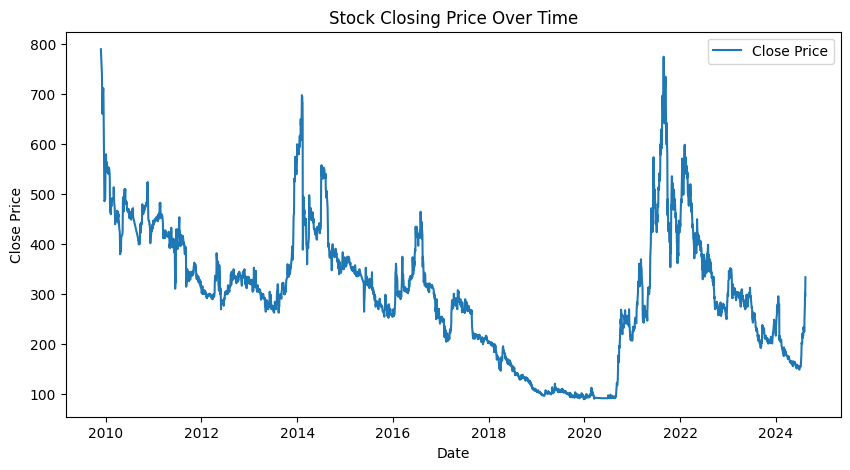

Closing Price Plot saved as byte stream.


In [ ]:
# Save Closing Price Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["published_date"], y=df["close"], label="Close Price")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
closing_price_img_stream = save_plot_to_bytes(plt.gcf())  # Save plot to byte stream
plt.show()
plt.close()  # Close the plot to free memory
print("Closing Price Plot saved as byte stream.")

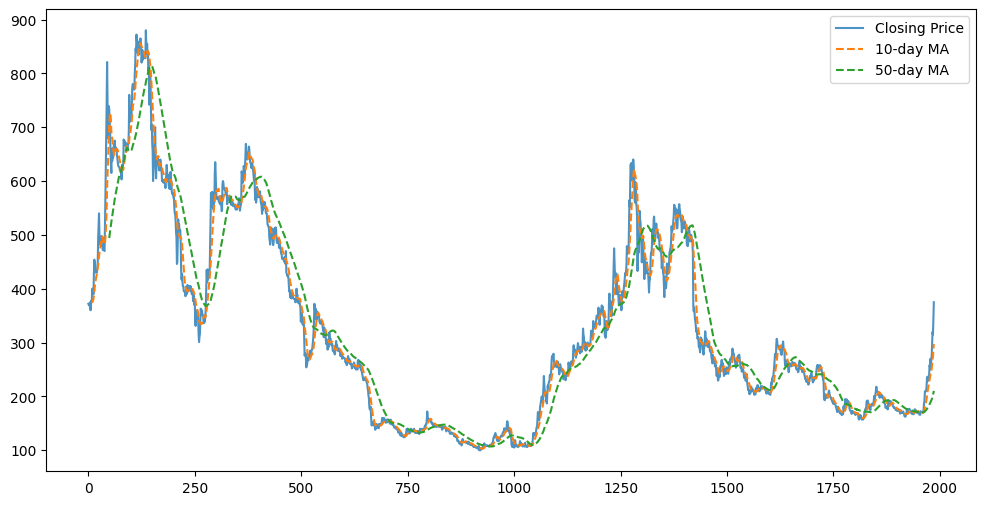

Moving Averages Plot saved as byte stream.


In [108]:
# Moving Averages Plot
df['10-day MA'] = df['close'].rolling(window=10).mean()
df['50-day MA'] = df['close'].rolling(window=50).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Closing Price', alpha=0.8)
plt.plot(df['10-day MA'], label='10-day MA', linestyle='dashed')
plt.plot(df['50-day MA'], label='50-day MA', linestyle='dashed')
plt.legend()
moving_avg_img_stream = save_plot_to_bytes(plt.gcf())  # Save plot to byte stream
plt.show()
plt.close()
print("Moving Averages Plot saved as byte stream.")

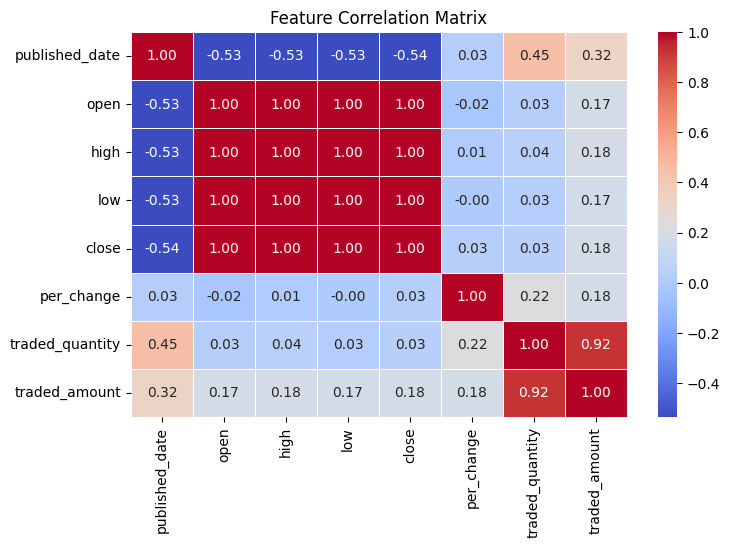

Heatmap Plot saved as byte stream.


In [109]:
# Heatmap Plot
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
heatmap_img_stream = save_plot_to_bytes(plt.gcf())  # Save plot to byte stream
plt.show()
plt.close()
print("Heatmap Plot saved as byte stream.")

In [110]:
# Combine all results into a dictionary
eda_results = {
    'dataframe': df,
    'eda_statistics': eda_stats,
    'missing_values': missing_values,
    'correlation_matrix': correlation_matrix,
    'closing_price_plot': closing_price_img_stream,
    'moving_avg_plot': moving_avg_img_stream,
    'heatmap_plot': heatmap_img_stream
}


In [ ]:
# Dump everything into one joblib file
joblib.dump(eda_results, './EDA_Results/eda_results_AHPC.joblib')

['eda_all_results.joblib']